# Import Libraries

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2.1

In [20]:
customers = pd.read_csv('credit_card_customers.csv')

# 2.2

In [21]:
print(f"Row Count: {customers.shape[0]}")
print(f"Column Count: {customers.shape[1]}")

Row Count: 10127
Column Count: 23


In [22]:
customers.tail(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,R60K - R80K,Blue,54,...,11859.0,1644,10215.0,0.866,8930,79,0.837,0.139,0.992680,0.007320
10108,714471183,Attrited Customer,47,M,4,Graduate,Divorced,R80K - R120K,Blue,39,...,17504.0,476,17028.0,0.892,10468,66,0.737,0.027,0.998160,0.001844
10109,780613758,Existing Customer,47,M,5,High School,Single,Less than R40K,Blue,35,...,4165.0,0,4165.0,0.813,17093,111,0.820,0.000,0.000896,0.999100
10110,718225683,Existing Customer,56,M,1,Graduate,Single,R80K - R120K,Silver,49,...,34516.0,1091,33425.0,0.640,15274,108,0.714,0.032,0.000097,0.999900
10111,710734308,Existing Customer,49,M,1,Graduate,Single,R60K - R80K,Blue,40,...,6481.0,1569,4912.0,0.692,15937,119,0.803,0.242,0.000284,0.999720
10112,708564858,Attrited Customer,33,M,2,College,Married,R120K +,Gold,20,...,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,0.994380,0.005620
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,R60K - R80K,Blue,36,...,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189,0.993380,0.006620
10114,720841533,Existing Customer,29,M,0,Graduate,Married,Less than R40K,Blue,15,...,4700.0,0,4700.0,0.617,14723,96,0.655,0.000,0.000235,0.999770
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,R40K - R60K,Blue,36,...,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276,0.000174,0.999830
10116,714109308,Existing Customer,46,M,5,College,Single,R80K - R120K,Blue,36,...,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,0.000192,0.999810


In [23]:
customers.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [24]:
customers.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

# 2.3

In [25]:
customers.drop(customers.iloc[:, :1], axis = 1, inplace=True)
customers.drop(customers.iloc[:, customers.shape[1]-7:customers.shape[1]], axis = 1, inplace=True)
customers.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,Existing Customer,45,M,3,High School,Married,R60K - R80K,Blue,39,5,1,3,12691.0,777,11914.0
1,Existing Customer,49,F,5,Graduate,Single,Less than R40K,Blue,44,6,1,2,8256.0,864,7392.0
2,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,Blue,36,4,1,0,3418.0,0,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than R40K,Blue,34,3,4,1,3313.0,2517,796.0
4,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,Blue,21,5,1,0,4716.0,0,4716.0


# 2.4

* I think it refers to the usable amount in the credit card. The amount of money that can be used to buy.

# 2.5

In [28]:
customers.describe(include='all')

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
count,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,NaN,F,NaN,Graduate,Married,Less than R40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637
std,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324
min,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000
25%,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000
50%,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000
75%,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000


## 2.5.1
* There are 7 categories for education level and most of customers are in the Graduate category which are 3128 in number out of the 10127 total number.  

# 2.6

In [37]:
#R120 000 (R120K) or more for:
more_than_120k=customers[(customers.Income_Category=="R120K +")]
more_than_120k

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
6,Existing Customer,51,M,4,Unknown,Married,R120K +,Gold,46,6,1,3,34516.0,2264,32252.0
10,Existing Customer,42,M,5,Uneducated,Unknown,R120K +,Blue,31,5,3,2,6748.0,1467,5281.0
53,Existing Customer,49,M,2,Unknown,Married,R120K +,Blue,36,4,2,0,19763.0,2517,17246.0
54,Attrited Customer,56,M,2,Graduate,Married,R120K +,Blue,36,1,3,3,15769.0,0,15769.0
63,Existing Customer,44,M,4,Post-Graduate,Single,R120K +,Blue,32,2,4,2,23957.0,2102,21855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,Attrited Customer,49,M,1,Uneducated,Single,R120K +,Blue,30,5,3,3,5181.0,0,5181.0
10057,Existing Customer,50,M,2,Uneducated,Single,R120K +,Blue,40,5,3,4,21794.0,1368,20426.0
10085,Existing Customer,49,M,3,Uneducated,Married,R120K +,Gold,38,4,3,4,14938.0,0,14938.0
10098,Attrited Customer,55,M,3,Graduate,Single,R120K +,Silver,36,4,3,4,34516.0,0,34516.0


In [62]:
uneducated_customers= more_than_120k[(more_than_120k.Education_Level=="Uneducated")].shape[0]
print(f'Percentage of Uneducated: {round((uneducated_customers/customers.shape[0])*100,2)} %')

Percentage of Uneducated: 1.18 %


In [63]:
Phd_customers= more_than_120k[(more_than_120k.Education_Level=="Doctorate")].shape[0]
print(f'Percentage of PhD: {round((Phd_customers/customers.shape[0])*100,2)} %')

Percentage of PhD: 0.37 %


# 2.6
* More people from the uneducated category earn more than people with PhD. Being educated does not always imply making a lot of money.

# 2.7

<AxesSubplot:xlabel='Education_Level', ylabel='Card_Category'>

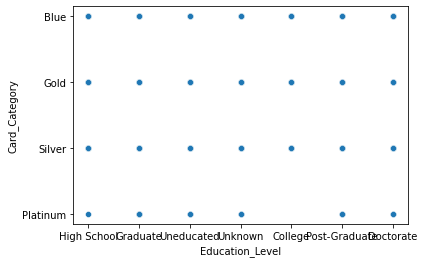

In [66]:

sns.scatterplot(data=customers, x='Education_Level',y='Card_Category')

##  * It seems like theres no clear relationship between Card Category and Education level.
##  * Most customers use Blue card

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Open_To_Buy'>

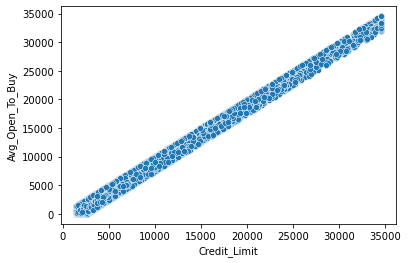

In [60]:
sns.scatterplot(data=customers, x='Credit_Limit',y='Avg_Open_To_Buy')

##  * Customers' Credit limit and Avg_Open_To_Buy are highly positively correlated
##  * There's a linear relationship between customers' Credit limit and Avg_Open_To_Buy

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

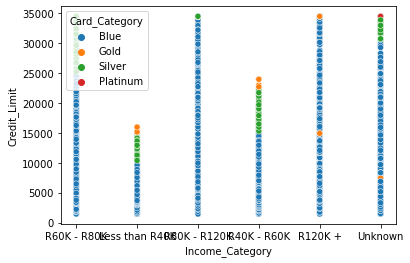

In [65]:
sns.scatterplot(data=customers, x='Income_Category',y='Credit_Limit', hue='Card_Category')

##  * Low credit limit customers use a Blue card
##  * Platinum card has the highest credit limit
##  * Customers with low income use Blue card

# 2.8

In [93]:
Existing = ((customers[customers["Attrition_Flag"]=="Existing Customer"]).shape)[0]


In [94]:
attrited = ((customers[customers["Attrition_Flag"]=="Attrited Customer"]).shape)[0]


In [95]:
print(f"Existing Customers: { Existing }")
print(f"Attrited Customers: { attrited }")

Existing Customers: 8500
Attrited Customers: 1627


# 2.9

In [96]:
Customer_types=customers["Attrition_Flag"].value_counts()

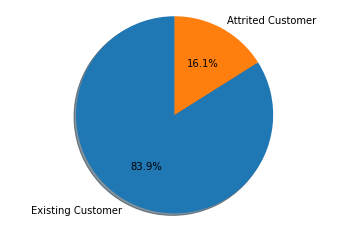

In [131]:
labels = Customer_types.index
sizes = Customer_types.to_list()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2.10



In [102]:
y=customers["Attrition_Flag"]
X=customers.drop("Attrition_Flag", axis=1)

In [123]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
customers_resampled= pd.concat([ y_resampled, X_resampled], axis=1)

In [124]:
customers_resampled.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,Attrited Customer,62,F,0,Graduate,Married,Less than R40K,Blue,49,2,3,3,1438.3,0,1438.3
1,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0
2,Attrited Customer,54,F,1,Graduate,Married,Less than R40K,Blue,40,2,3,1,1438.3,808,630.3
3,Attrited Customer,56,M,2,Graduate,Married,R120K +,Blue,36,1,3,3,15769.0,0,15769.0
4,Attrited Customer,48,M,2,Graduate,Married,R60K - R80K,Silver,35,2,4,4,34516.0,0,34516.0


# 2.11

In [127]:
Customer_types_resampled=customers_resampled["Attrition_Flag"].value_counts()
Customer_types_resampled

Attrited Customer    1627
Existing Customer    1627
Name: Attrition_Flag, dtype: int64

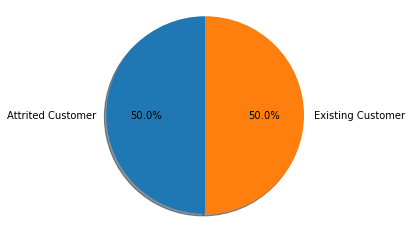

In [129]:
labels = Customer_types_resampled.index
sizes = Customer_types_resampled.to_list()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2.12

In [135]:
customers_resampled.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
dtype: object

In [138]:
print(f"Attrition_Flag: {customers_resampled['Attrition_Flag'].unique()}\n")
print(f"Gender: {customers_resampled['Gender'].unique()}\n")
print(f"Education_Level: {customers_resampled['Education_Level'].unique()}\n")
print(f"Marital_Status: {customers_resampled['Marital_Status'].unique()}\n")
print(f"Income_Category: {customers_resampled['Income_Category'].unique()}\n")
print(f"Card_Category: {customers_resampled['Card_Category'].unique()}\n")


Attrition_Flag: ['Attrited Customer' 'Existing Customer']

Gender: ['F' 'M']

Education_Level: ['Graduate' 'Doctorate' 'Unknown' 'High School' 'College' 'Uneducated'
 'Post-Graduate']

Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']

Income_Category: ['Less than R40K' 'Unknown' 'R120K +' 'R60K - R80K' 'R40K - R60K'
 'R80K - R120K']

Card_Category: ['Blue' 'Silver' 'Gold' 'Platinum']



In [139]:
#Binary Categories
label_encoder = LabelEncoder()

customers_resampled['Gender'] = label_encoder.fit_transform(customers_resampled['Gender'])
customers_resampled['Attrition_Flag'] = label_encoder.fit_transform(customers_resampled['Attrition_Flag'])

customers_resampled.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,0,62,0,0,Graduate,Married,Less than R40K,Blue,49,2,3,3,1438.3,0,1438.3
1,0,66,0,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0
2,0,54,0,1,Graduate,Married,Less than R40K,Blue,40,2,3,1,1438.3,808,630.3
3,0,56,1,2,Graduate,Married,R120K +,Blue,36,1,3,3,15769.0,0,15769.0
4,0,48,1,2,Graduate,Married,R60K - R80K,Silver,35,2,4,4,34516.0,0,34516.0
5,0,55,0,4,Unknown,Married,R40K - R60K,Blue,45,2,4,3,2158.0,0,2158.0
6,0,47,1,2,Unknown,Married,R80K - R120K,Blue,37,2,3,3,5449.0,1628,3821.0
7,0,53,1,2,Graduate,Married,R80K - R120K,Blue,41,3,3,2,11669.0,2227,9442.0
8,0,48,0,5,High School,Married,Less than R40K,Blue,38,1,3,3,8025.0,0,8025.0
9,0,59,1,1,College,Single,R60K - R80K,Blue,53,2,3,3,14979.0,0,14979.0


In [141]:
# Non- Binary Categories
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
customers_resampled['Education_Level'] = label_encoder.fit_transform(customers_resampled['Education_Level'])
customers_resampled['Marital_Status'] = label_encoder.fit_transform(customers_resampled['Marital_Status'])
customers_resampled['Income_Category'] = label_encoder.fit_transform(customers_resampled['Income_Category'])
customers_resampled['Card_Category'] = label_encoder.fit_transform(customers_resampled['Card_Category'])




In [142]:
customers_resampled.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,0,62,0,0,2,1,0,0,49,2,3,3,1438.3,0,1438.3
1,0,66,0,0,1,1,5,0,56,5,4,3,7882.0,605,7277.0
2,0,54,0,1,2,1,0,0,40,2,3,1,1438.3,808,630.3
3,0,56,1,2,2,1,1,0,36,1,3,3,15769.0,0,15769.0
4,0,48,1,2,2,1,3,3,35,2,4,4,34516.0,0,34516.0
5,0,55,0,4,6,1,2,0,45,2,4,3,2158.0,0,2158.0
6,0,47,1,2,6,1,4,0,37,2,3,3,5449.0,1628,3821.0
7,0,53,1,2,2,1,4,0,41,3,3,2,11669.0,2227,9442.0
8,0,48,0,5,3,1,0,0,38,1,3,3,8025.0,0,8025.0
9,0,59,1,1,0,2,3,0,53,2,3,3,14979.0,0,14979.0


In [143]:
customers_resampled.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
dtype: object

# 2.13

In [144]:
y = customers_resampled['Attrition_Flag']
X = customers_resampled.drop('Attrition_Flag', axis=1)
print(X.shape)
print(y.shape)

(3254, 14)
(3254,)


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [152]:
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
2946,38,1,3,2,2,4,0,31,6,1,2,13637.0,0,13637.0
1315,45,0,4,4,2,0,0,36,1,3,3,4477.0,2517,1960.0
1124,42,1,2,3,2,3,0,33,3,3,3,4836.0,493,4343.0
765,50,1,3,4,0,3,0,36,3,2,3,14409.0,511,13898.0
818,45,0,4,6,1,0,0,39,3,2,2,3411.0,1472,1939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,52,0,3,2,2,0,0,38,2,3,4,2437.0,0,2437.0
1130,41,0,5,6,1,2,0,30,5,2,3,1588.0,0,1588.0
1294,56,0,3,3,3,0,0,44,4,3,2,1667.0,595,1072.0
860,35,1,1,1,2,4,0,27,3,2,2,2904.0,2517,387.0


In [176]:
print(f"dimensions of X_train: {X_train.shape}")
print(f"dimensions of X_test: {X_test.shape}")

dimensions of X_train: (2603, 14)
dimensions of X_test: (651, 14)


### Normalize the data

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy'])

In [179]:
X_train_scaled

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy
0,-1.068396,1.105842,0.520028,-0.577226,0.720107,1.118720,-0.249658,-0.651648,1.514062,-1.485936,-0.567395,0.565157,-1.074610,0.670593
1,-0.185247,-0.904288,1.296638,0.494471,0.720107,-1.081528,-0.249658,-0.016685,-1.633281,0.537020,0.312253,-0.434896,1.741403,-0.605345
2,-0.563739,1.105842,-0.256583,-0.041377,0.720107,0.568658,-0.249658,-0.397663,-0.374344,0.537020,0.312253,-0.395702,-0.523043,-0.344956
3,0.445573,1.105842,0.520028,0.494471,-2.006349,0.568658,-0.249658,-0.016685,-0.374344,-0.474458,0.312253,0.649440,-0.502904,0.699113
4,-0.185247,-0.904288,1.296638,1.566167,-0.643121,-1.081528,-0.249658,0.364293,-0.374344,-0.474458,-0.567395,-0.551278,0.572260,-0.607640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,0.697901,-0.904288,0.520028,-0.577226,0.720107,-1.081528,-0.249658,0.237300,-1.003812,0.537020,1.191901,-0.657615,-1.074610,-0.553224
2599,-0.689903,-0.904288,2.073248,1.566167,-0.643121,0.018596,-0.249658,-0.778641,0.884593,-0.474458,0.312253,-0.750306,-1.074610,-0.645993
2600,1.202557,-0.904288,0.520028,-0.041377,2.083335,-1.081528,-0.249658,0.999256,0.255125,0.537020,-0.567395,-0.741681,-0.408925,-0.702376
2601,-1.446888,1.105842,-1.033193,-1.113074,0.720107,1.118720,-0.249658,-1.159619,-0.374344,-0.474458,-0.567395,-0.606630,1.741403,-0.777226


# 2.14

In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC(gamma = 'auto')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 5, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s(acc): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s(f1): %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN(acc): 0.679596 (0.007002)
KNN(f1): 0.686236 (0.005817)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR(acc): 0.694973 (0.014203)
LR(f1): 0.702237 (0.016303)
SVM(acc): 0.531305 (0.013035)
SVM(f1): 0.677889 (0.009846)


# 2.15 

In [181]:
#Logistic Regression has a highest f1 score
model=models[1][1]
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [182]:
from sklearn import metrics

print(metrics.accuracy_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7035330261136713
[[242 107]
 [ 86 216]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       349
           1       0.67      0.72      0.69       302

    accuracy                           0.70       651
   macro avg       0.70      0.70      0.70       651
weighted avg       0.71      0.70      0.70       651



# 2.16

* The model is consistent. it has around 70% for both accuracy and f1 score for both training and testing.


* precision is the ability of a classification model to return only the data points in a class.
* Recall is the ability of a classification model to identify all data points in a relevant class.
* F1-score is a single metric that combines recall and precision using the harmonic mean.